# EDA Notebook - Class Histogram Visualize

이 노트북은 train dataset의 class 분포를 시각화합니다.

노트북에 사용한 train.csv는 "utility notebook - make_train_csv.ipynb"을 사용하여 생성하였습니다.

- 404Vector

In [7]:
# library를 불러옵니다.
import os
import pandas as pd
import seaborn as sbn

In [8]:
# TRAIN DATASET DATAFRAME
train_path = '../Data/carbon_reduction_data/train/'
label_list = ["10Kwalk","battery",'box','else','toothcup', 'tumbler','handkerchief',
              'milk', 'paper', 'pet','plug','receipt', 'shopping bag', 'stairs',
             'transportation', 'trash picking', 'green dish','leftover','wrap']

train_img_paths = []
train_img_labels = []

for label in label_list: ## 각 레이블 돌기
    print(f'label: {label}',end=' ')
    img_paths = [] 
    img_labels = []

    dir_path = train_path + label ## 레이블 폴더 경로
    
    for folder, subfolders, filenames in os.walk(dir_path): ## 폴더 내 모든 파일 탐색
        for img in filenames: ## 각 파일 경로, 레이블 저장
            img_paths.append(folder+'/'+img)
            img_labels.append(label)
        
    print(len(img_paths))

    train_img_paths.extend(img_paths)
    train_img_labels.extend(img_labels)

print('Train_Images: ',len(train_img_paths))
print("Train_Images_labels:", len(train_img_labels))

label: 10Kwalk 1467
label: battery 2103
label: box 5907
label: else 2838
label: toothcup 2105
label: tumbler 2508
label: handkerchief 1824
label: milk 1781
label: paper 1249
label: pet 5199
label: plug 2198
label: receipt 632
label: shopping bag 1284
label: stairs 3045
label: transportation 1677
label: trash picking 1221
label: green dish 1261
label: leftover 1483
label: wrap 1266
Train_Images:  41048
Train_Images_labels: 41048


In [9]:
# TEST DATASET DATAFRAME
test_path = '../Data/carbon_reduction_data/test/'
test_img_paths = []
test_img_labels = []

for label in label_list: ## 각 레이블 돌기
    print(f'label: {label}',end=' ')
    img_paths = [] 
    img_labels = []
    dir_path = test_path + label ## 레이블 폴더 경로
    
    for folder, subfolders, filenames in os.walk(dir_path): ## 폴더 내 모든 파일 탐색
        for img in filenames: ## 각 파일 경로, 레이블 저장
            img_paths.append(folder+'/'+img)
            img_labels.append(label)
        
    print(len(img_paths))

    test_img_paths.extend(img_paths)
    test_img_labels.extend(img_labels)

print('Test_Images: ',len(test_img_paths))
print("Test_Images_labels:", len(test_img_labels))

label: 10Kwalk 489
label: battery 702
label: box 1969
label: else 946
label: toothcup 702
label: tumbler 837
label: handkerchief 609
label: milk 594
label: paper 417
label: pet 1734
label: plug 733
label: receipt 211
label: shopping bag 429
label: stairs 1016
label: transportation 559
label: trash picking 407
label: green dish 421
label: leftover 495
label: wrap 423
Test_Images:  13693
Test_Images_labels: 13693


In [10]:
train_img_paths.extend(test_img_paths)
train_img_labels.extend(test_img_labels)
print(len(train_img_paths))

54741


In [11]:
## Pandas 데이터프레임 만들기
trn_df = pd.DataFrame(train_img_paths, columns=['image_id'])
trn_df['dir'] = trn_df['image_id'].apply(lambda x: os.path.dirname(x))
trn_df['image_id'] = trn_df['image_id'].apply(lambda x: os.path.basename(x))
trn_df['label'] = train_img_labels
train = trn_df
train

,image_id,dir,label
0,0720.jpg,../Data/carbon_reduction_data/train/10Kwalk,10Kwalk
1,0282.jpg,../Data/carbon_reduction_data/train/10Kwalk,10Kwalk
2,1028.jpg,../Data/carbon_reduction_data/train/10Kwalk,10Kwalk
3,1322.jpg,../Data/carbon_reduction_data/train/10Kwalk,10Kwalk
4,0540.jpg,../Data/carbon_reduction_data/train/10Kwalk,10Kwalk
...,...,...,...
54736,0381.jpg,../Data/carbon_reduction_data/test/wrap,wrap
54737,0236.jpg,../Data/carbon_reduction_data/test/wrap,wrap
54738,0384.jpg,../Data/carbon_reduction_data/test/wrap,wrap
54739,0074.jpg,../Data/carbon_reduction_data/test/wrap,wrap


In [14]:
# 누적개수를 구하여 적은 순으로 정렬합니다.
keys = train['label'].values
counts = [sum(train['label'] == key) for key in keys]
train['dens'] = [counts[label] for label in train['label'].values]
train.sort_values(by=['dens', 'img_path'], inplace=True)

TypeError: list indices must be integers or slices, not str

In [15]:
# 한글 깨짐을 방지하기 등을 위한 설정 입니다.
sbn.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False,
            "figure.figsize":(11.7,8.27),
            },
        style='whitegrid')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


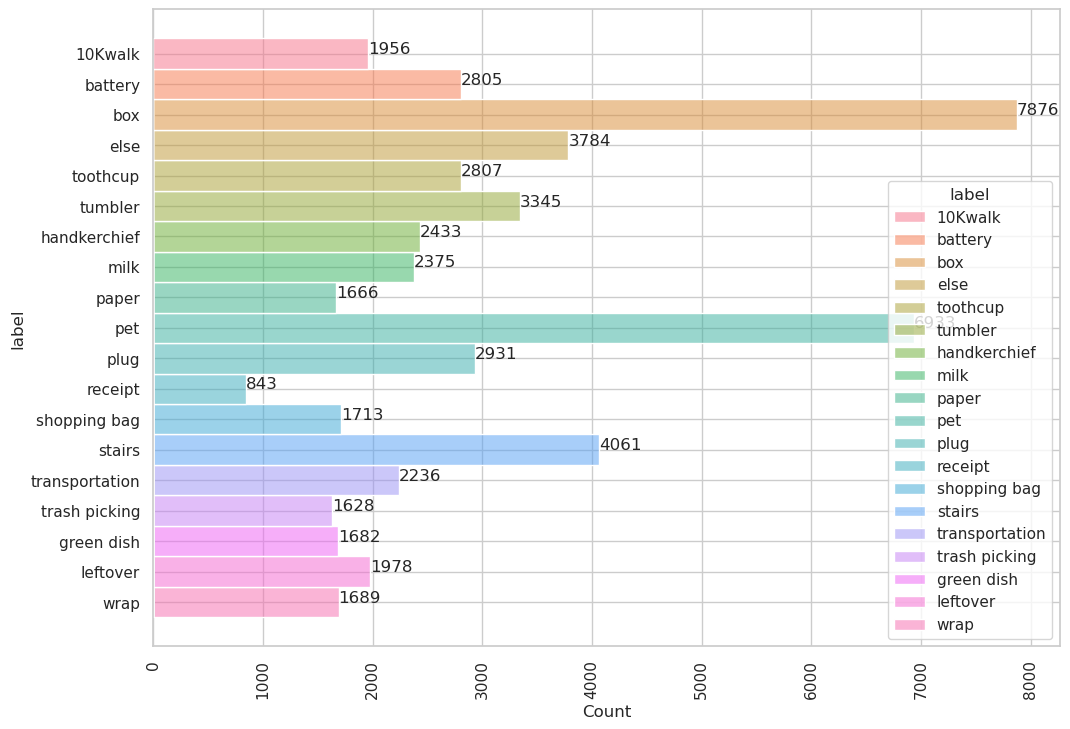

In [16]:
axes = sbn.histplot(data=train,y='label', hue='label', discrete=True, element="bars", stat='count', kde=False)
axes.tick_params(axis='x', rotation=90)
for i, container in enumerate(axes.containers):
    values = container.datavalues.tolist()
    x = max(values)
    y = values.index(x)
    axes.text(x, y, x)